# The nationality of economists on DBpedia

We will extract data on economists through requests to DBpedia.

In [5]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter
import pandas as pd

In [6]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql") ##, returnFormat=RDFXML)

In [12]:
query = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT DISTINCT ?economist ?name ?nationality

WHERE
     {
        {?economist ?propriety dbr:Economist .
        ?economist foaf:name ?name .
        ?economist dbo:nationality ?nationality1 .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)
        }
     UNION
        {
         ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbo:nationality ?nationality1 .
        ?economist owl:sameAs ?sameAs .

        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
        UNION
       {
        ?economist a dbo:Professor .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbo:nationality ?nationality1 .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
    FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        FILTER (CONTAINS(?name, " "))
       }
       UNION
       {
        ?economist a dbo:Person .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbo:nationality ?nationality1 .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
        FILTER (CONTAINS(?name, " "))
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  }
     }
"""

In [13]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
rc = sparql.queryAndConvert()
type(rc)

dict

In [14]:
# Number of rows in the result
len(rc['results']['bindings'])

1690

In [15]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Bamberger'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig Bamberger'}, 'nationality': {'type': 'literal', 'value': 'German Empire'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Amoroso'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Amoroso'}, 'nationality': {'type': 'literal', 'value': 'Italy'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Einaudi'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Einaudi'}, 'nationality': {'type': 'literal', 'value': 'Italian nationality law'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Pasinetti'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Pasinetti'}, 'nationality': {'type': 'literal', 'value': 'Italian people'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luis_Guillermo_Vélez'}, 'name': {'type'

In [18]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['nationality']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['nationality']['value']])
            except :
                print([l['economist']['value'],'',l['nationality']['value']])

        i += 1

['http://dbpedia.org/resource/Ludwig_Bamberger', 'Ludwig Bamberger', 'German Empire']
['http://dbpedia.org/resource/Luigi_Amoroso', 'Luigi Amoroso', 'Italy']
['http://dbpedia.org/resource/Luigi_Einaudi', 'Luigi Einaudi', 'Italian nationality law']
['http://dbpedia.org/resource/Luigi_Pasinetti', 'Luigi Pasinetti', 'Italian people']
['http://dbpedia.org/resource/Luis_Guillermo_Vélez', 'Luis Guillermo Vélez Trujillo', 'Colombian people']


In [17]:
# Explore
nationalityList = []
for l in rc['results']['bindings']:
    nationalityList.append(l['nationality']['value'])

In [39]:
counterNationalityList= Counter(nationalityList)
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())), reverse=False)
groupedNationalityList

[(1, 'Adygea'),
 (1, 'Albania'),
 (1, 'Anarchism in Spain'),
 (1, 'Andorra'),
 (1, 'Argentine American'),
 (1, 'Argentines'),
 (1, 'Armenian language'),
 (1, 'Australian nationality law'),
 (1, 'Austria-Hungary'),
 (1, 'Austrian School'),
 (1, 'Austro-Hungarian'),
 (1, 'Azerbaijan'),
 (1, 'Belarusian American'),
 (1, 'Belgian'),
 (1, 'Bolivia'),
 (1, 'Bolivian people'),
 (1, 'Bolivians'),
 (1, 'Bosnia and Herzegovina'),
 (1, 'Bosniaks'),
 (1, 'Brazilians'),
 (1, 'British Indian'),
 (1, 'British Raj'),
 (1, 'British-Iranian'),
 (1, 'Bulgaria'),
 (1, 'Bulgarians'),
 (1, 'Burma'),
 (1, 'Catalan American'),
 (1, 'Chamber of Representatives (Belgium)'),
 (1, 'Chechen people'),
 (1, 'Chileans'),
 (1, 'Chinese Indonesians'),
 (1, 'Chinese language'),
 (1, 'Colombians'),
 (1, 'Costa Rica'),
 (1, 'Costa Rican'),
 (1, 'Cuban-American'),
 (1, 'Cubans'),
 (1, 'Czech lands'),
 (1, 'Danish American'),
 (1, 'Danish people'),
 (1, 'Danish-American'),
 (1, 'Demographics of Cyprus'),
 (1, 'Dominican peo

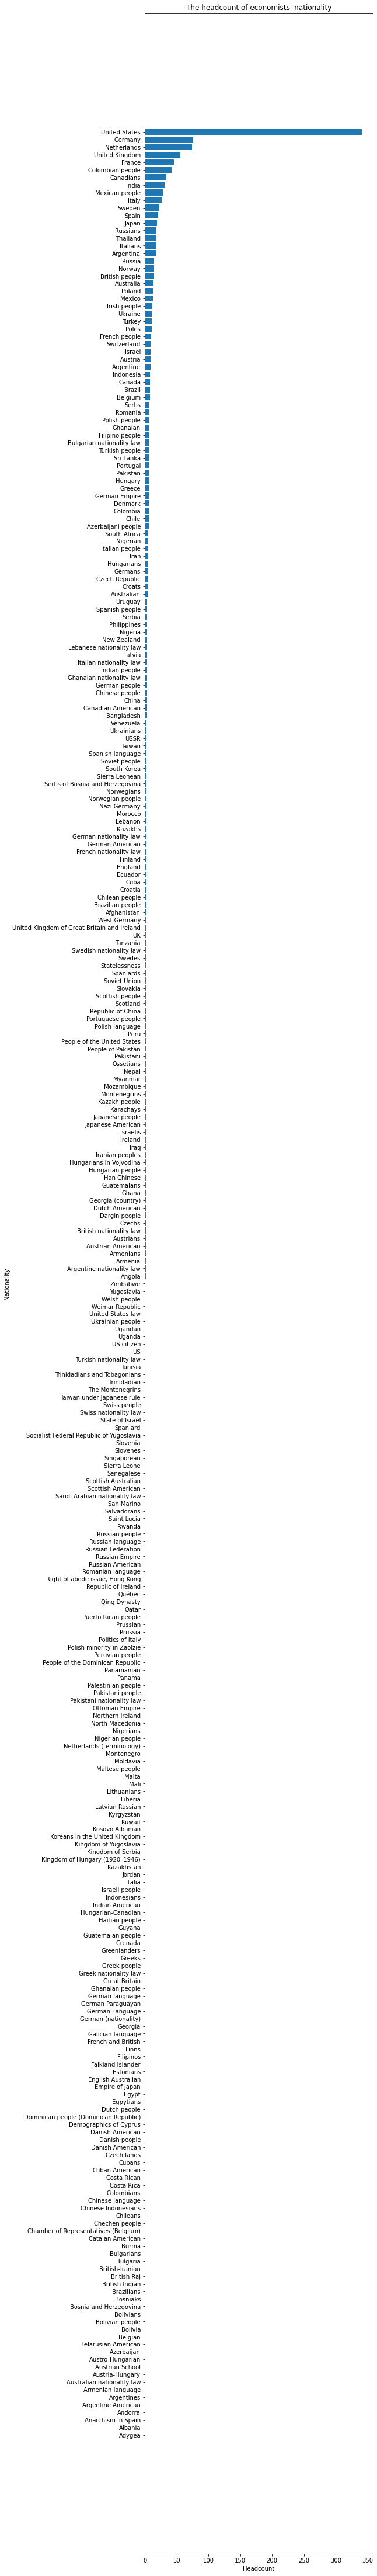

In [34]:
# Barplot
## choose the 
eff = [l[1] for l in groupedNationalityList]
objects = [l[0] for l in groupedNationalityList]
p1 = plt.barh(eff, objects)
## add labels and a title
plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("The headcount of economists' nationality")
plt.gcf().set_size_inches(7, 80)
## Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [44]:
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())),reverse=True)
bGNL=(groupedNationalityList[0:30])

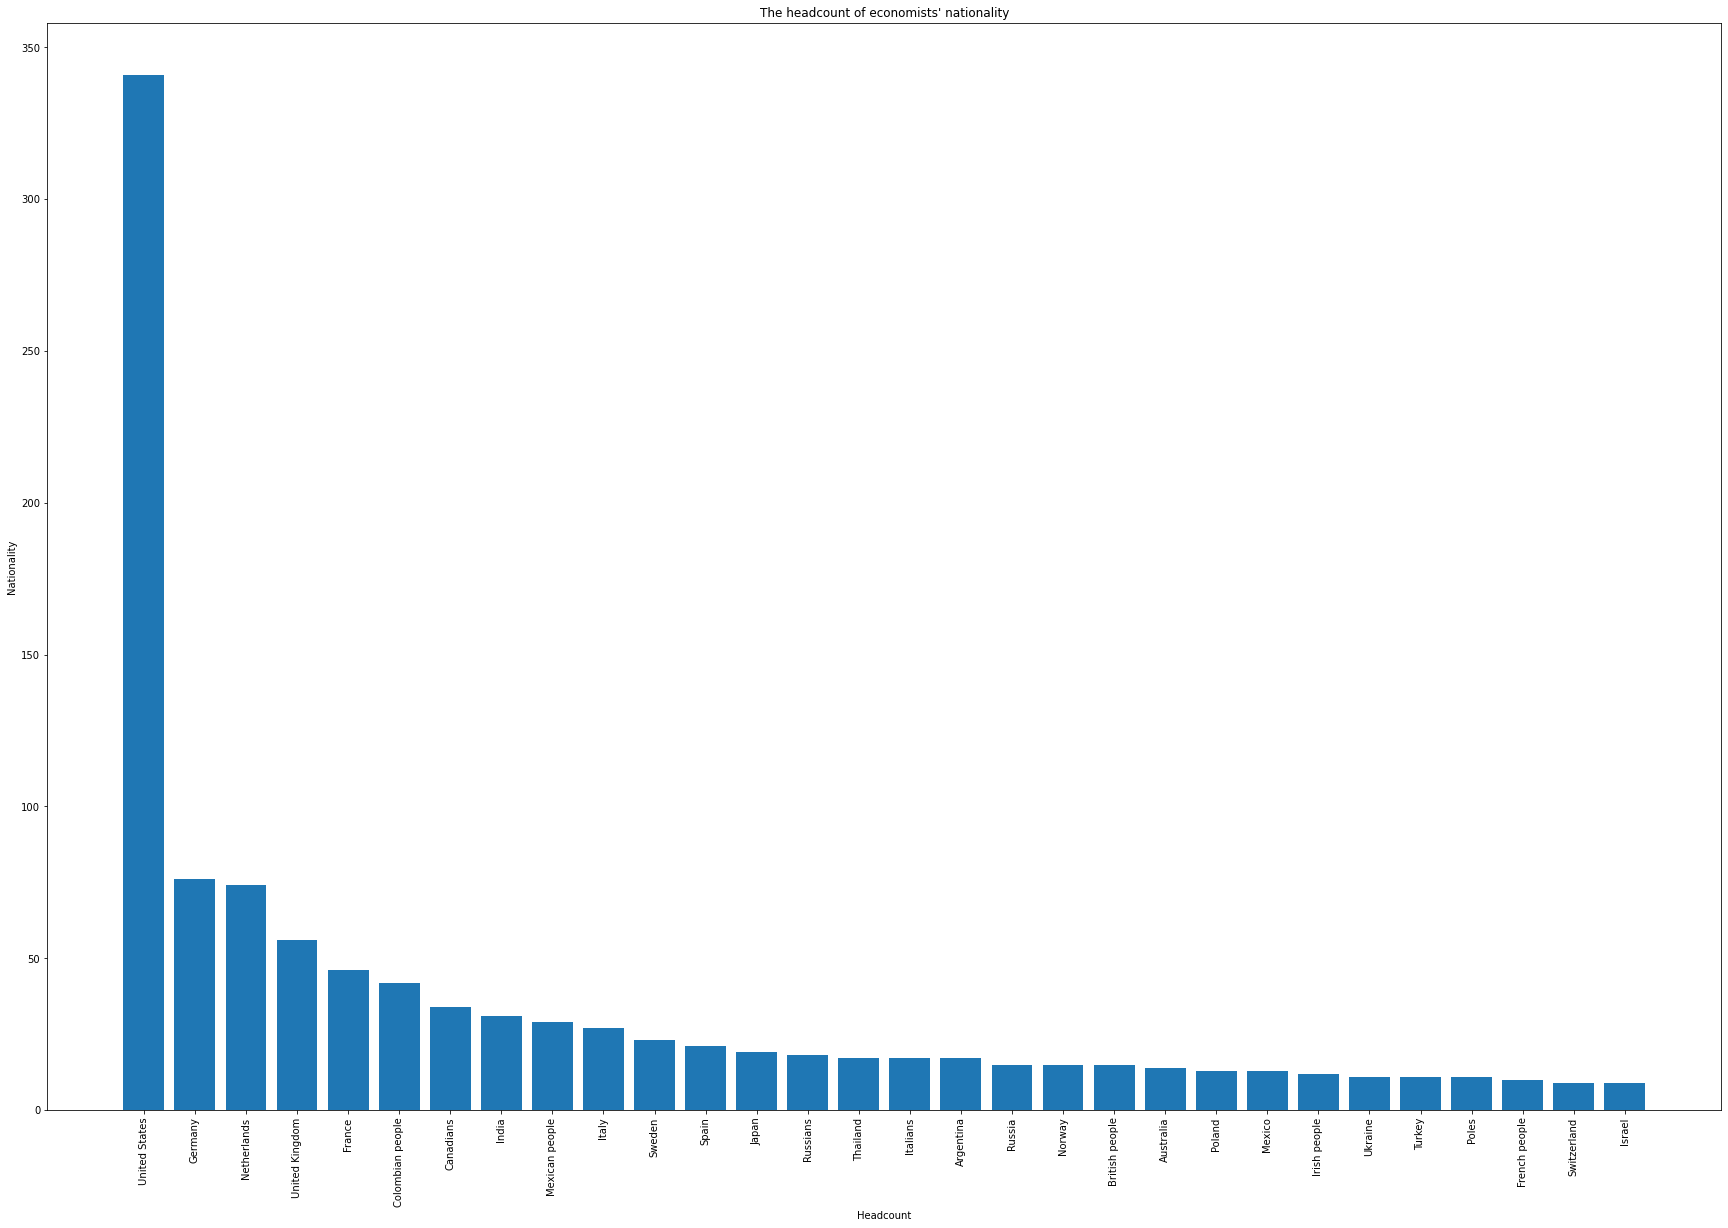

In [53]:
# Barplot
eff = [l[1] for l in bGNL]
objects = [l[0] for l in bGNL]
p1 = plt.bar(eff, objects)
## add labels and a title
plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("The headcount of economists' nationality")
plt.gcf().set_size_inches(30, 20)
plt.xticks(rotation='vertical')
## Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [54]:
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())),reverse=True)
bGNL=(groupedNationalityList[1:30])

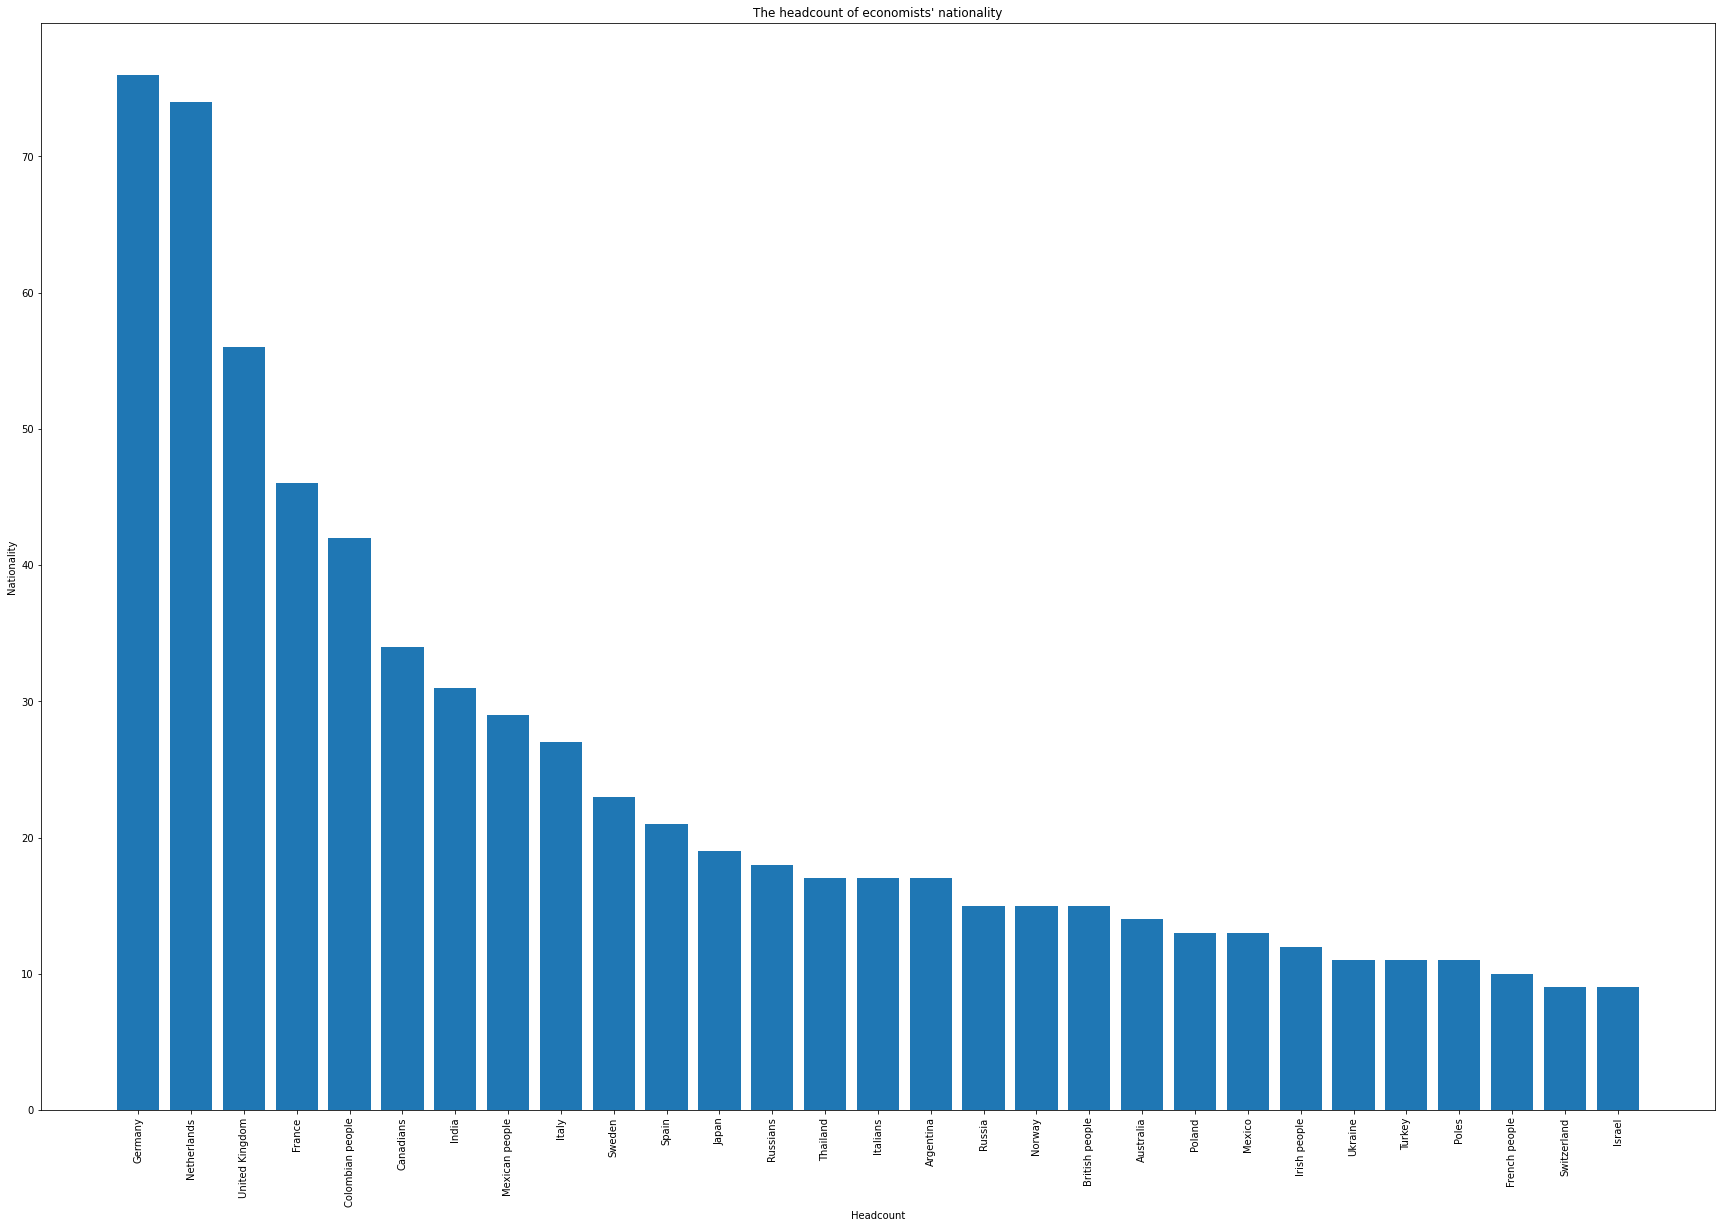

In [55]:
# Barplot
eff = [l[1] for l in bGNL]
objects = [l[0] for l in bGNL]
p1 = plt.bar(eff, objects)
## add labels and a title
plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("Barplot of the top 30 nationalities of economists")
plt.gcf().set_size_inches(30, 20)
plt.xticks(rotation='vertical')
## Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()